# Compare Monte Carlo and simple Riemann integral
by calculating the volume of N-dimensional sphere with same number of function evaluations

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Simple Linear Congruent Generators

In [4]:
def seedLCG(initVal):
    global randLCG
    randLCG = initVal
    
def lcg():
    a = 1140671485 #4
    c = 128201163 # 1
    m =  2**24 # 9
    global randLCG
    randLCG = (a*randLCG + c) % m
    return randLCG / m

def lcgN(n):
    return np.array([lcg() for i in range(n)])

#### A very weak one

In [10]:
def seedLCG_w(initVal):
    global randLCG_w
    randLCG_w = initVal
    
def lcg_w():
    a = 4
    c = 1
    m =  9
    global randLCG_w
    randLCG_w = (a*randLCG_w + c) % m
    return randLCG_w / m

def lcgN_weak(n):
    return np.array([lcg_w() for i in range(n)])

In [12]:
seedLCG(3)
seedLCG_w(3)

print(lcgN(20))
print(lcgN_weak(20))

[0.60934079 0.94434386 0.38775992 0.89973587 0.27463567 0.10495335
 0.68644905 0.91211575 0.76215422 0.31842309 0.26796365 0.75180048
 0.7404145  0.1416989  0.77396631 0.55630225 0.60937989 0.93739063
 0.42912745 0.71410984]
[0.44444444 0.88888889 0.66666667 0.77777778 0.22222222 0.
 0.11111111 0.55555556 0.33333333 0.44444444 0.88888889 0.66666667
 0.77777778 0.22222222 0.         0.11111111 0.55555556 0.33333333
 0.44444444 0.88888889]


### Demonstration in 2 dimensions

Relative errors:
Riemann: 0.00021083321836568025
MC: 0.04082620963284411
MC with LCG: 0.15966190047479256


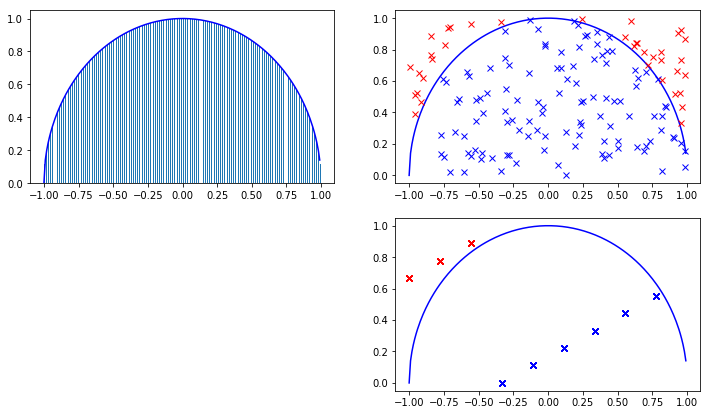

In [19]:
# 2D: Half circle

def half_circle(x,r):
    return np.sqrt(r*r-x*x)

# number of divisions
n = 150

# Riemann integral
x100 = np.arange(-1.0,1.0,0.01)
#xN = np.linspace(-1,1,n)
halfBin = 2.0/(n-1) / 2
xN = np.linspace(-(1-halfBin),1-halfBin,n) # shift with half bin

fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(221)
ax1.plot(x100,half_circle(x100,1.0),'b')
ax1.bar(xN,half_circle(xN,1.0), width=0.9/n)


# MC integral
xMC = 2*np.random.rand(n)-1.0
yMC = np.random.rand(n)
aboveIdx = (yMC >= half_circle(xMC,1.0))
belowIdx = (yMC < half_circle(xMC,1.0))

#USE LCG instead
xMC2 = 2*lcgN_weak(n)-1.0
yMC2 = lcgN_weak(n)
aboveIdx2 = (yMC2 >= half_circle(xMC2,1.0))
belowIdx2 = (yMC2 < half_circle(xMC2,1.0))
            
ax2 = fig.add_subplot(222)
ax2.plot(x100,half_circle(x100,1.0),'b')
ax2.plot(xMC[belowIdx],yMC[belowIdx],'bx')
ax2.plot(xMC[aboveIdx],yMC[aboveIdx],'rx')   

ax3 = fig.add_subplot(224)
ax3.plot(x100,half_circle(x100,1.0),'b')
ax3.plot(xMC2[belowIdx2],yMC2[belowIdx2],'bx')
ax3.plot(xMC2[aboveIdx2],yMC2[aboveIdx2],'rx')    

dx = 2.0/len(xN)
areaCirc = np.pi

print('Relative errors:')
print('Riemann:',np.abs(1-2*np.nan_to_num(half_circle(xN,1.0)).sum() * dx / areaCirc)) 
print('MC:',np.abs(1-2*belowIdx.sum()/n/(np.pi/2.0)))
print('MC with LCG:',np.abs(1-2*belowIdx2.sum()/n/(np.pi/2.0)))


In [20]:
lst = []
for i in range(300):
    n = i+10
    
    dx = 2.0/len(xN)
    areaCirc = np.pi
    
    # Riemann integral
    x100 = np.arange(-1.0,1.0,0.01)
    #xN = np.linspace(-1,1,n)
    halfBin = 2.0/(n-1) / 2
    xN = np.linspace(-(1-halfBin),1-halfBin,n) # shift with half bin

    # MC integral
    xMC = 2*np.random.rand(n)-1.0
    yMC = np.random.rand(n)
    aboveIdx = (yMC >= half_circle(xMC,1.0))
    belowIdx = (yMC < half_circle(xMC,1.0))

    #USE LCG instead
    xMC2 = 2*lcgN_weak(n)-1.0
    yMC2 = lcgN_weak(n)
    aboveIdx2 = (yMC2 >= half_circle(xMC2,1.0))
    belowIdx2 = (yMC2 < half_circle(xMC2,1.0))
    
    rel1 = np.abs(1-2*np.nan_to_num(half_circle(xN,1.0)).sum() * dx / areaCirc) 
    rel2 = np.abs(1-2*belowIdx.sum()/n/(np.pi/2.0))
    rel3 = np.abs(1-2*belowIdx2.sum()/n/(np.pi/2.0))
    lst.append([n,rel1,rel2,rel3])
    
lst = np.array(lst)


Text(0,0.5,'Relative error')

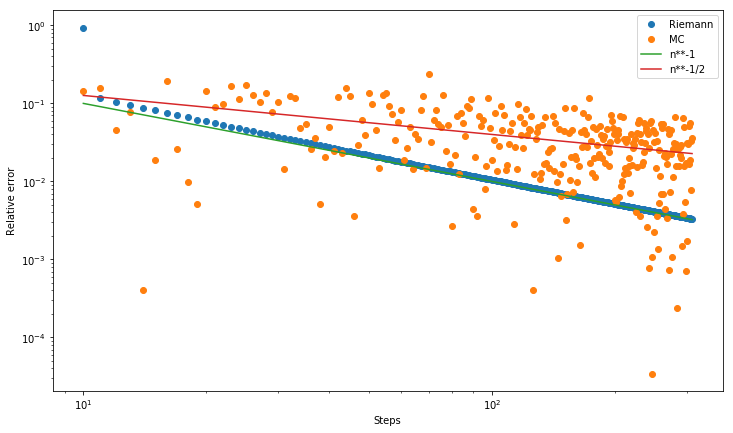

In [22]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(111)
ax1.loglog(lst[:,0],lst[:,1],'o',label='Riemann')
ax1.loglog(lst[:,0],lst[:,2],'o',label='MC')
ax1.loglog(lst[:,0],lst[:,0]**-1,label='n**-1')
ax1.loglog(lst[:,0],0.4*lst[:,0]**-0.5,label='n**-1/2')
ax1.legend()
plt.xlabel('Steps')
plt.ylabel('Relative error')
#ax1.semilogy(lst[:,0],lst[:,3],'.-',label='MC LCG')

### Higher dimensions

$$ {\displaystyle V_{n}(R)={\frac {\pi ^{\frac {n}{2}}}{\Gamma \left({\frac {n}{2}}+1\right)}}R^{n},} $$

In [35]:
# d dim, half hypersphere above a d-1 dimensional hypersphere

import math



def nSphereVolume(dd):
    '''The exact volume of a dd dimensional sphere'''
    return math.pi**(dd/2)/math.gamma(dd/2 + 1)

def half_hyperSphere(x,r):
    '''Returns the height of a radius r half-hypersphere above x'''
    return np.sqrt(r*r - (x*x).sum(axis=0))

# Riemann

DIM = 3

d = DIM-1 # this is(DIM-1), the hyperplane's dimension
n1 = int(100000**(1.0/d)) # the grid resolution on one side: max 100 in 4+1D
#x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d),np.ones(d))]) )
halfBin = 2.0/(n1-1) / 2
x1 = np.array( np.meshgrid(*[np.linspace(i,j,n1) for i,j in zip(-np.ones(d)+halfBin,np.ones(d)-halfBin)]) )
dV = 2.0**d/n1**d

# evaluate the hypersphere function and calculate the integral
funcValues = np.nan_to_num(half_hyperSphere(x1,1.0))
vol1 = funcValues.sum() * dV / (nSphereVolume(d+1) / 2)
print('Riemann:', vol1 )

# MC

# MC integral
nTry = 100 # several trials
idx = np.arange(nTry)
mcVec = [] # this will collect the estimates
for i in idx:  
    xMC = 2*np.random.rand(d,n1**d)-1
    yMC = np.random.rand(n1**d)
    ### USE LCG
    #xMC = 2 * np.array([lcgN(n1**d) for k in range(d)])-1 
    #yMC = lcgN(n1**d)
    aboveIdx = (yMC >= np.nan_to_num(half_hyperSphere(xMC,1.0)))
    belowIdx = (yMC < np.nan_to_num(half_hyperSphere(xMC,1.0)))
    mcVol = belowIdx.sum() /(belowIdx.sum()+aboveIdx.sum()) * 2**(d+1) / (nSphereVolume(d+1))
    mcVec.append(mcVol)
    print('MC:',mcVol,end=" ")



/home/csabai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in sqrt
  del sys.path[0]


Riemann: 1.000037998976144
MC: 1.0002012196351546 MC: 1.0017504365543717 MC: 0.9957639563603607 MC: 1.0035482932260553 MC: 1.0002968503091803 MC: 0.9988432640639892 MC: 0.998671128850743 MC: 0.9956683256863349 MC: 1.0009662650273605 MC: 0.9975426868972394 MC: 0.9978104527845113 MC: 0.9941573610367282 MC: 0.997255794875162 MC: 0.9989771470076254 MC: 1.0009471388925555 MC: 1.0045619783707282 MC: 0.9999525798826878 MC: 1.0005263639268422 MC: 1.0036821761696915 MC: 0.998537245907107 MC: 1.0047532397187797 MC: 1.0068379884125407 MC: 0.9939087212842613 MC: 0.9987858856595739 MC: 0.9998952014782724 MC: 0.9995509310517798 MC: 0.9958978393039968 MC: 0.9993022912993129 MC: 0.9943868746543901 MC: 0.9978678311889269 MC: 0.9993787958385334 MC: 1.0019416979024232 MC: 0.9947885234852981 MC: 1.0008132559489196 MC: 1.0008323820837246 MC: 0.9969306505834746 MC: 0.9982312277502247 MC: 0.9999908321522982 MC: 1.0037969329785223 MC: 0.9962803620000996 MC: 0.9976191914364599 MC: 0.9992640390297025 MC: 0.9982

In [36]:
print('Riemann difference from true ratio:', 1-vol1)
print('MC standard deviation around true ratio:', np.std(mcVec))

Riemann difference from true ratio: -3.799897614409353e-05
MC standard deviation around true ratio: 0.0029147307257599204


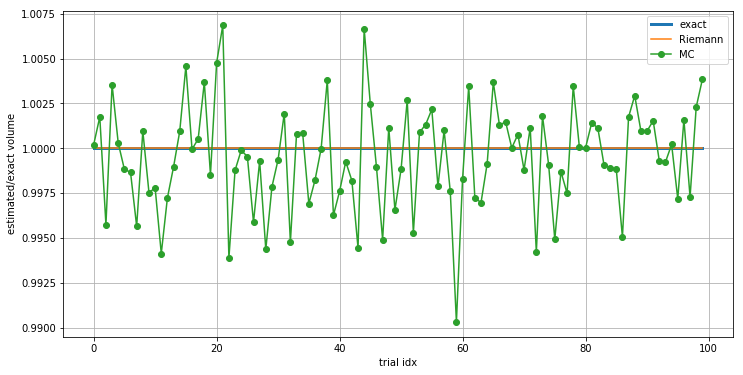

In [37]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(111)
ax1.plot(idx,np.ones(nTry),linewidth=3,label='exact')
ax1.plot(idx,vol1*np.ones(nTry),label='Riemann')
ax1.plot(idx,mcVec,'-o',label='MC')
ax1.set_xlabel('trial idx')
ax1.set_ylabel('estimated/exact volume')
ax1.grid()
ax1.legend()